[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/csound_ds/blob/master/Th09_S1--TC--Web_scraping_for_data_analysis.ipynb)

In [0]:
# requests is one of the best libraries on python for capturing web site data
import requests
page = requests.get("https://benchmarks.ul.com/compare/best-smartphones")

# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [0]:
# Return a list of all <a> elements that have class="OneLinkToTx" from
# the entire page.
onelinks = soup.find_all('a',class_="OneLinkNoTx")

In [7]:
print(len(onelinks))

200


In [9]:
# Collect the name of the phone, and the url to the detail page
# of each phone
phones = []
for link in onelinks:
    phone = {}
    phone['name'] = link.get_text()
    phone['url'] = link['href']
    phones.append(phone)
print(phones)

[{'name': 'Xiaomi Black Shark', 'url': 'http://benchmarks.ul.com/hardware/phone/Xiaomi+Black+Shark+review'}, {'name': 'Samsung Galaxy S9+ (SDM845)', 'url': 'http://benchmarks.ul.com/hardware/phone/Samsung+Galaxy+S9*2B+%28SDM845%29+review'}, {'name': 'Samsung Galaxy S9 (SDM845)', 'url': 'http://benchmarks.ul.com/hardware/phone/Samsung+Galaxy+S9+%28SDM845%29+review'}, {'name': 'OnePlus 6', 'url': 'http://benchmarks.ul.com/hardware/phone/OnePlus+6+review'}, {'name': 'Sony Xperia XZ2 Compact', 'url': 'http://benchmarks.ul.com/hardware/phone/Sony+Xperia+XZ2+Compact+review'}, {'name': 'Sony Xperia XZ2', 'url': 'http://benchmarks.ul.com/hardware/phone/Sony+Xperia+XZ2+review'}, {'name': 'Asus ZenFone 4 Pro', 'url': 'http://benchmarks.ul.com/hardware/phone/Asus+ZenFone+4+Pro+review'}, {'name': 'Sony Xperia XZ1 Compact', 'url': 'http://benchmarks.ul.com/hardware/phone/Sony+Xperia+XZ1+Compact+review'}, {'name': 'Razer Phone', 'url': 'http://benchmarks.ul.com/hardware/phone/Razer+Phone+review'}, {

In [0]:
# parse sublink loads the url specified by link and captures
# important data columns for our examination
# sseu and ss
# chipset
# memory
# os
# weight
# display size
# tensorflow
# popularity

# helper method, called below
def parse_sublink(link):
    page = requests.get(link)
    soup = BeautifulSoup(page.content, 'html.parser')
    sseu = 0
    ss = 0
    chipset = ''
    memory = ''
    os = ''
    weight = ''
    display_size = ''
    tensorflow = 0
    popularity = ''
    
    # try/except prevents failure during error conditions
    # try happens first, if there is an error, execution ends, and runs
    # "except" afterward.
    try:
        chipset_element = soup.find(string="Chipset")
        chipset = chipset_element.find_next('span').get_text()
    except:
        None
    try:
        sseu_element = soup.find(string="Sling Shot Extreme Unlimited")
        next_span = sseu_element.find_next('span')
        sseu_text = next_span.get_text()
        sseu = int(sseu_text)
    except:
        None
    try:
        ss = int(soup.find(string="Sling Shot").find_next('span').get_text())
    except:
        None
    try:
        popularity = float(soup.find(string="Popularity").find_next('span').get_text()[:-1])
    except:
        None
    try:
        tensorflow = int(soup.find(string="TensorFlow").find_next('span').get_text())
    except:
        None
    # pack the values into a single python dictionary object before returning
    return {'sseu':sseu,'ss':ss,'chipset':chipset,'popularity':popularity,'tensorflow':tensorflow}

# iterate over all the phones that we loaded from the original phone list website
# (the one with 200 phones, the 200 names and urls)
for i,phone in enumerate(phones):
    # Print out i whenever i is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(i%20==0):
        print(i)
    # load the website, parse it into sublink dictionary object
    sublink = parse_sublink(phone['url'])
    # Try to load all the expected values into the current phone object
    try:
        phone['sseu'] = sublink['sseu']
    except:
        None
    try:
        phone['ss'] = sublink['ss']
    except:
        None
    try:
        phone['chipset'] = sublink['chipset']
    except:
        None
    try:
        phone['popularity'] = sublink['popularity']
    except:
        None
    try:
        phone['tensorflow'] = sublink['tensorflow']
    except:
        None


In [23]:
print(phones)

[{'name': 'Xiaomi Black Shark', 'url': 'http://benchmarks.ul.com/hardware/phone/Xiaomi+Black+Shark+review', 'sseu': 5048, 'ss': 6273, 'chipset': 'Snapdragon 845', 'popularity': 0.6}, {'name': 'Samsung Galaxy S9+ (SDM845)', 'url': 'http://benchmarks.ul.com/hardware/phone/Samsung+Galaxy+S9*2B+%28SDM845%29+review', 'sseu': 4995, 'ss': 6169, 'chipset': 'Snapdragon 845', 'popularity': 1.7}, {'name': 'Samsung Galaxy S9 (SDM845)', 'url': 'http://benchmarks.ul.com/hardware/phone/Samsung+Galaxy+S9+%28SDM845%29+review', 'sseu': 5001, 'ss': 6134, 'chipset': 'Snapdragon 845', 'popularity': 0.7}, {'name': 'OnePlus 6', 'url': 'http://benchmarks.ul.com/hardware/phone/OnePlus+6+review', 'sseu': 4917, 'ss': 6121, 'chipset': 'Snapdragon 845', 'popularity': 2.3}, {'name': 'Sony Xperia XZ2 Compact', 'url': 'http://benchmarks.ul.com/hardware/phone/Sony+Xperia+XZ2+Compact+review', 'sseu': 4415, 'ss': 5999, 'chipset': 'Snapdragon 845', 'popularity': 0.2}, {'name': 'Sony Xperia XZ2', 'url': 'http://benchmarks

In [24]:
# Lets create a dataframe object to store all the data that is in the list
# of phones above
import pandas as pd
df_Phones = pd.DataFrame(columns=['name','sseu','ss','price','popularity','chipset']) # tensorflow

# iterate over phones list and create a new df_Phones row for each one
for i in range(len(phones)):
    phone = phones[i]
    df_Phones.loc[len(df_Phones)]=[phone['name'],phone['sseu'],phone['ss'],0,phone['popularity'],phone['chipset']]

# Observe new data
print(df_Phones.head())

# Save to a file in colab instance
df_Phones.to_csv('phones.csv')


                          name  sseu    ss price  popularity         chipset
0           Xiaomi Black Shark  5048  6273     0         0.6  Snapdragon 845
1  Samsung Galaxy S9+ (SDM845)  4995  6169     0         1.7  Snapdragon 845
2   Samsung Galaxy S9 (SDM845)  5001  6134     0         0.7  Snapdragon 845
3                    OnePlus 6  4917  6121     0         2.3  Snapdragon 845
4      Sony Xperia XZ2 Compact  4415  5999     0         0.2  Snapdragon 845


In [0]:
from google.colab import files

# download the same file to my local machine
files.download('phones.csv')

In [3]:
# This portion loads the previously saved file from a preceeding session
# (This way we don't have to crawl all 200 web pages again and again).
from google.colab import files
import pandas as pd

# Creates upload dialog for you to pick the file previously downloaded
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Load that uploaded file into the expected DataFrame
df_Phones = pd.read_csv('phones.csv')

Saving phones.csv to phones (1).csv
User uploaded file "phones.csv" with length 6621 bytes


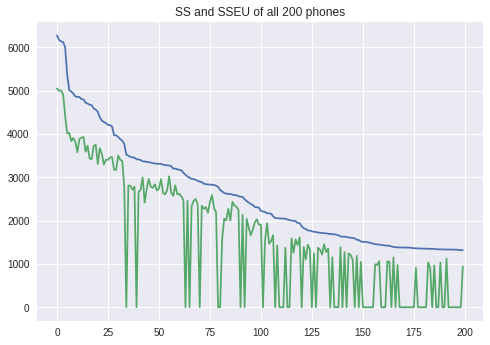

Chipsets of phones
['Snapdragon 845' 'Snapdragon 835 (MSM8998)' 'Apple A11'
 'Exynos 9 Octa (9810)' 'Snapdragon 820 (MSM8996)'
 'Snapdragon 821 (MSM8996 Pro)' 'Exynos 9 Octa (8895)'
 'HiSilicon Kirin 970' 'MT6799' 'Apple A9' 'Apple A10'
 'Exynos 8 Octa (8890)' 'Snapdragon 810 (MSM8994)' 'HiSilicon Kirin 960'
 'Snapdragon 660 (MSM8976 Plus)' 'Snapdragon 805 (APQ8084)'
 'Snapdragon 805 (APQ8084AB Pro)' 'Snapdragon 808 (MSM8992)'
 'Exynos 7 Octa (7420)' 'MT6771' 'Apple A8' 'Snapdragon 653 (MSM8976 Pro)'
 'Snapdragon 636' 'Snapdragon 652 (MSM8976)' 'Snapdragon 650 (MSM8956)'
 'Snapdragon 630' 'MT6797' 'Snapdragon 801 (MSM8974AC v3)' 'MT6797T']


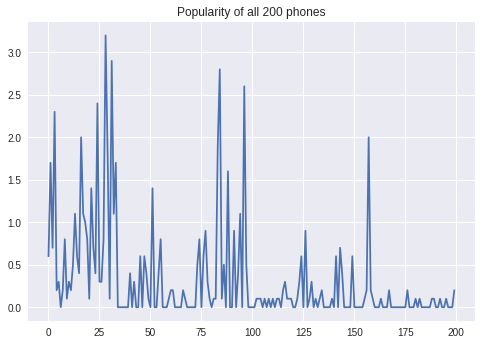

In [32]:
import matplotlib.pyplot as plt
plt.plot(df_Phones['ss'])
plt.plot(df_Phones['sseu'])
plt.title('SS and SSEU of all 200 phones')
plt.show()
plt.plot(df_Phones['popularity'])
plt.title('Popularity of all 200 phones')
print('Chipsets of phones')
print(df_Phones['chipset'].unique())

In [0]:
import requests
from bs4 import BeautifulSoup
df_Phones.loc[0]['price'] = 9876
# Now df_Phones is our favorite data source
for i in range(len(df_Phones)):
    phone = df_Phones.loc[i]
    print(phone)
    name_words = phone['name'].split(' ')
   
    price = []
    private = []
    while(len(price) == 0):
        request = 'https://camelcamelcamel.com/search?sq=new '+ ' '.join(name_words)
        print(request)
        page = requests.get(request)
        soup = BeautifulSoup(page.content, 'html.parser')
        try:
            price = soup.find_all('div',{'class':'price_amazon'})[0]
            private = soup.find_all('div',{'class':'price_new'})[0]
            print(price)
            print(private)
            break
        except:
            name_words = name_words[:-1]
    if('$' in price.get_text()):
        phone['price'] = float(price.get_text().strip()[1:].replace(',',''))
    elif('$' in private.get_text()):
        phone['price'] = float(private.get_text().strip()[1:].replace(',',''))
    else:
        phone['price'] = 9999.0
    print(phone)
    break
print(df_Phones.loc[0])

In [0]:
import matplotlib.pyplot as plt
plt.plot(df_Phones[['ss','price']])

In [35]:
print(df_Phones[['name','price']].head(40))

                                           name price
0                            Xiaomi Black Shark     0
1                   Samsung Galaxy S9+ (SDM845)     0
2                    Samsung Galaxy S9 (SDM845)     0
3                                     OnePlus 6     0
4                       Sony Xperia XZ2 Compact     0
5                               Sony Xperia XZ2     0
6                            Asus ZenFone 4 Pro     0
7                       Sony Xperia XZ1 Compact     0
8                                   Razer Phone     0
9                                ZTE Nubia Z17S     0
10                       Motorola Moto Z2 Force     0
11                                ZTE Nubia Z17     0
12                                      Nokia 8     0
13               Samsung Galaxy Note8 (MSM8998)     0
14                            Google Pixel 2 XL     0
15                              Sony Xperia XZ1     0
16                                   OnePlus 5T     0
17                          